In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

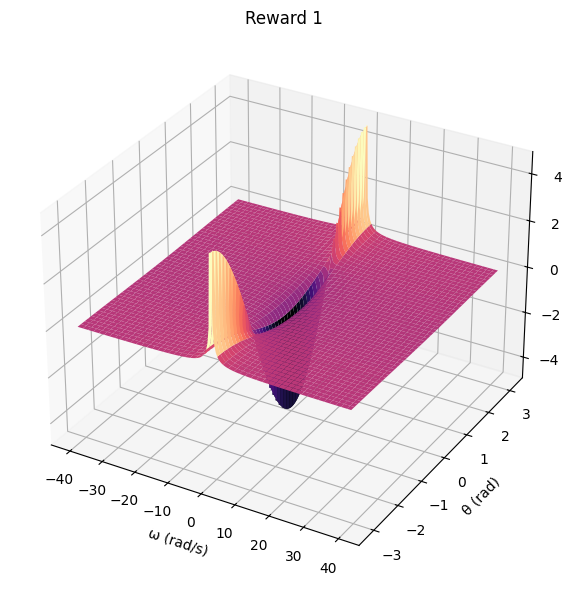

In [ ]:
theta = np.linspace(-np.pi, np.pi, 200)
omega = np.linspace(-40, 40, 200)

Tg, Og = np.meshgrid(theta, omega)

distance = np.abs(np.abs(Tg))
omega = np.abs(np.abs(Og))
reward1 = -np.cos(distance) / (0.01 + np.abs(omega))

fig4 = plt.figure(figsize=(8,6))
ax4 = fig4.add_subplot(111, projection='3d')
ax4.plot_surface(Og, Tg, reward1, cmap='magma', edgecolor='none')
ax4.set_title('Reward 1')
ax4.set_xlabel('ω (rad/s)')
ax4.set_ylabel('θ (rad)')
ax4.set_zlabel('Reward')

plt.tight_layout()
plt.show()

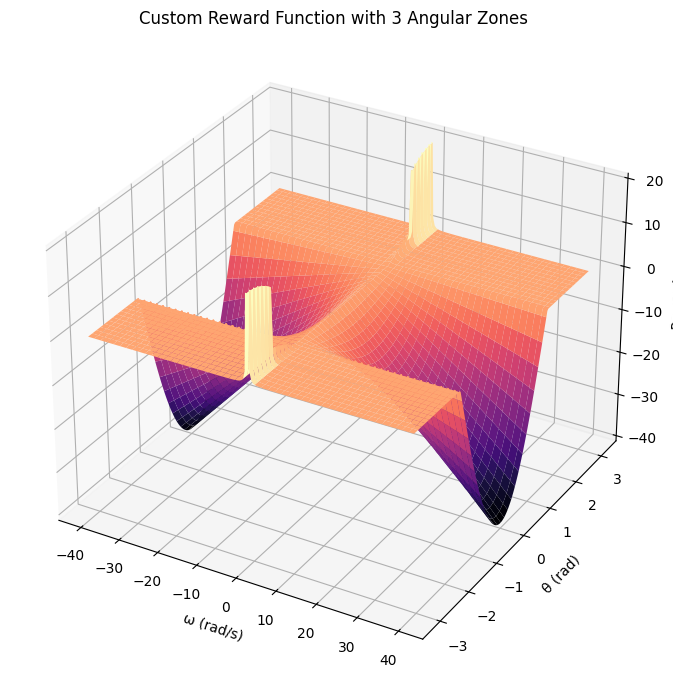

In [ ]:
theta_abs = np.abs(Tg)
omega_abs = np.abs(Og)

# Initialize reward surface
reward1 = np.zeros_like(theta_abs)

# Region 1: θ < 0.5π
mask1 = theta_abs < 0.5 * np.pi
reward1[mask1] = (-np.cos(theta_abs[mask1])) * (0.01 + omega_abs[mask1])

# Region 2: 0.5π ≤ θ < 0.75π
mask2 = (theta_abs >= 0.5 * np.pi) & (theta_abs < 0.75 * np.pi)
reward1[mask2] = (-np.cos(theta_abs[mask2])) / (0.01 + omega_abs[mask2])

# Region 3: 0.75π ≤ θ ≤ π
mask3 = (theta_abs >= 0.75 * np.pi) & (theta_abs <= np.pi)
reward1[mask3] = (-np.cos(theta_abs[mask3]))**0.5 / (0.01 + omega_abs[mask3]**2)

# Plot
fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Og, Tg, reward1, cmap='magma', edgecolor='none')
ax.set_title('Custom Reward Function with 3 Angular Zones')
ax.set_xlabel('ω (rad/s)')
ax.set_ylabel('θ (rad)')
ax.set_zlabel('Reward')

plt.tight_layout()
plt.show()

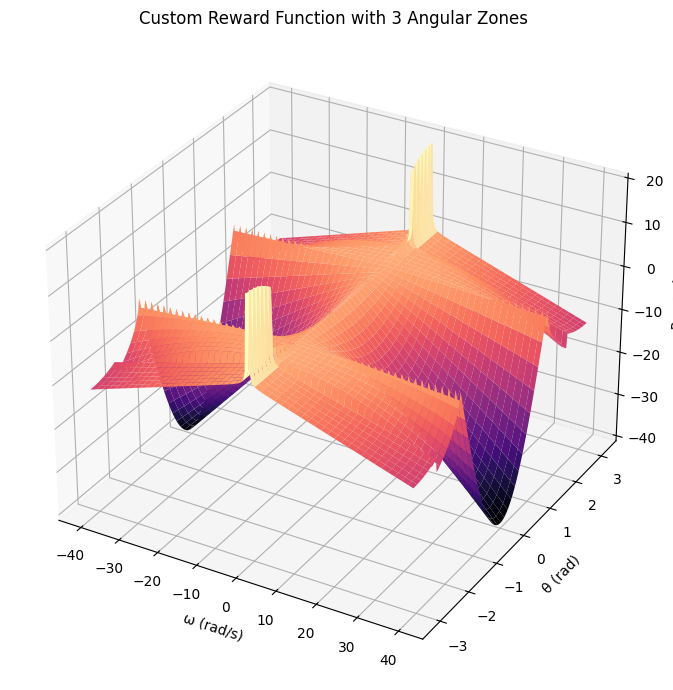

In [ ]:
theta_abs = np.abs(Tg)
omega_abs = np.abs(Og)

# Initialize reward surface
reward1 = np.zeros_like(theta_abs)

# Region 1: θ < 0.5π
mask1 = theta_abs < 0.5 * np.pi
reward1[mask1] = (-np.cos(theta_abs[mask1])) * (0.01 + omega_abs[mask1])

# Region 2: 0.5π ≤ θ < 0.75π
mask2 = (theta_abs >= 0.5 * np.pi) & (theta_abs < 0.75 * np.pi)
reward1[mask2] = ((-np.cos(theta_abs[mask2])) - 0.01 * (-np.cos(theta_abs[mask2]))**0.5 * omega_abs[mask2] ** 3) / (0.01 + omega_abs[mask2])

# Region 3: 0.75π ≤ θ ≤ π
mask3 = (theta_abs >= 0.75 * np.pi) & (theta_abs <= np.pi)
reward1[mask3] = ((-np.cos(theta_abs[mask3]))**0.5 - 0.3 * (-np.cos(theta_abs[mask3]))**0.5 * omega_abs[mask3] ** 3) / (0.01 + omega_abs[mask3]**2)

# Plot
fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Og, Tg, reward1, cmap='magma', edgecolor='none')
ax.set_title('Custom Reward Function with 3 Angular Zones')
ax.set_xlabel('ω (rad/s)')
ax.set_ylabel('θ (rad)')
ax.set_zlabel('Reward')

plt.tight_layout()
plt.show()

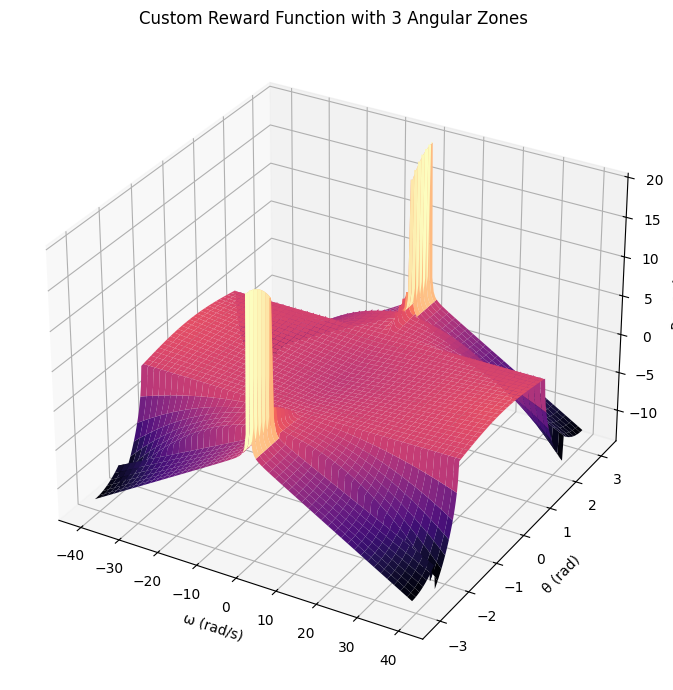

In [ ]:
theta_abs = np.abs(Tg)
omega_abs = np.abs(Og)

# Initialize reward surface
reward1 = np.zeros_like(theta_abs)

# Region 1: θ < 0.5π
mask1 = theta_abs < 0.5 * np.pi
reward1[mask1] = 0.05 * (np.cos(theta_abs[mask1])) * (0.01 + omega_abs[mask1]) - np.cos(theta_abs[mask1]) # + 0.8 * omega_abs[mask1] * np.cos(theta_abs[mask1])

# Region 2: 0.5π ≤ θ < 0.75π
mask2 = (theta_abs >= 0.5 * np.pi) & (theta_abs < 0.75 * np.pi)
reward1[mask2] = ((-np.cos(theta_abs[mask2])) - 0.01 * (-np.cos(theta_abs[mask2]))**0.5 * omega_abs[mask2] ** 3) / (0.01 + omega_abs[mask2])

# Region 3: 0.75π ≤ θ ≤ π
mask3 = (theta_abs >= 0.75 * np.pi) & (theta_abs <= np.pi)
reward1[mask3] = ((-np.cos(theta_abs[mask3]))**0.5 - 0.3 * (-np.cos(theta_abs[mask3]))**0.5 * omega_abs[mask3] ** 3) / (0.01 + omega_abs[mask3]**2)

# Plot
fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Og, Tg, reward1, cmap='magma', edgecolor='none')
ax.set_title('Custom Reward Function with 3 Angular Zones')
ax.set_xlabel('ω (rad/s)')
ax.set_ylabel('θ (rad)')
ax.set_zlabel('Reward')

plt.tight_layout()
plt.show()

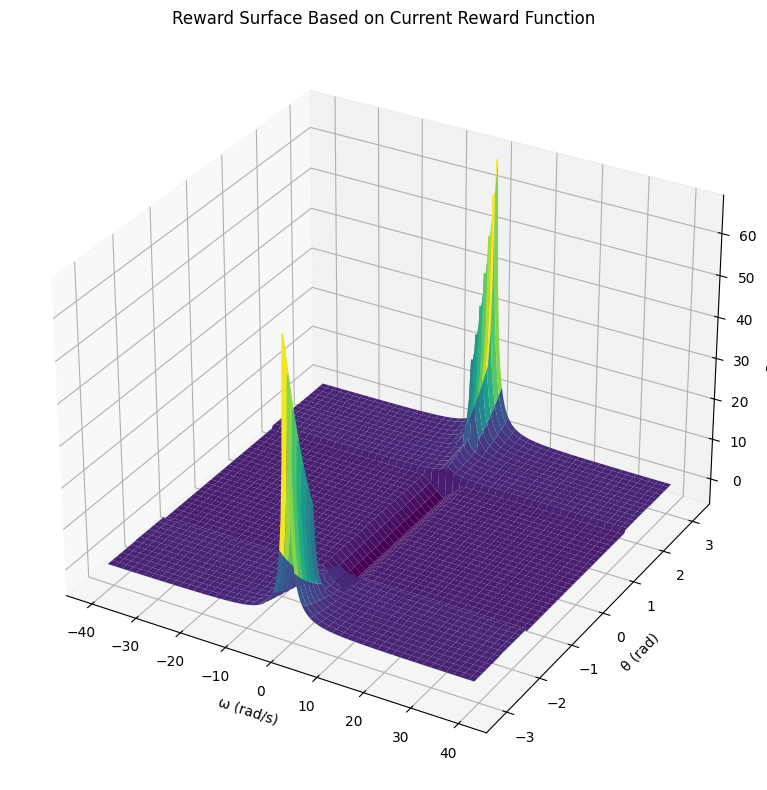

In [ ]:
# Normalize theta to (-pi, pi)
theta_abs = np.abs(((Tg - np.pi) % (2 * np.pi)) - np.pi)
omega_abs = np.abs(Og)

# Initialize reward surface
reward = np.zeros_like(theta_abs)

# Region 1: abs(theta) < pi/2
mask1 = theta_abs < np.pi / 2
reward[mask1] = np.minimum(-0.5, -5 + omega_abs[mask1])

# Region 2: pi/2 ≤ abs(theta) < 3*pi/4
mask2 = (theta_abs >= np.pi / 2) & (theta_abs < 3 * np.pi / 4)
reward[mask2] = theta_abs[mask2]**2 / (1 + omega_abs[mask2])

# Region 3: 3*pi/4 ≤ abs(theta) < 11*pi/12
mask3 = (theta_abs >= 3 * np.pi / 4) & (theta_abs < 11 * np.pi / 12)
reward[mask3] = theta_abs[mask3]**4 / (1 + omega_abs[mask3])**2

# Region 4: abs(theta) ≥ 11*pi/12
mask4 = theta_abs >= 11 * np.pi / 12
reward[mask4] = theta_abs[mask4]**4 / (1 + omega_abs[mask4])**2

# Plotting
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Og, Tg, reward, cmap='viridis', edgecolor='none')

ax.set_title('Reward Surface Based on Current Reward Function')
ax.set_xlabel('ω (rad/s)')
ax.set_ylabel('θ (rad)')
ax.set_zlabel('Reward')

plt.tight_layout()
plt.show()

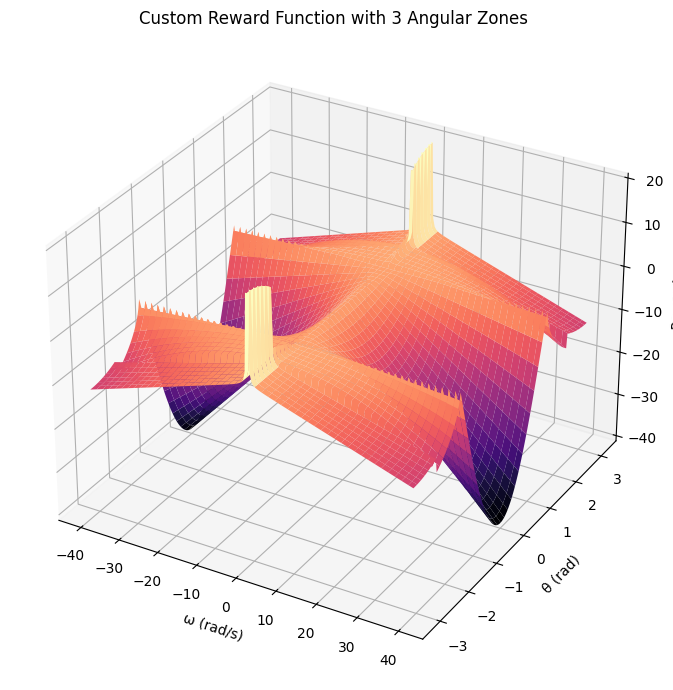

In [ ]:
theta_abs = np.abs(Tg)
omega_abs = np.abs(Og)

# Initialize reward surface
reward1 = np.zeros_like(theta_abs)

# Region 1: θ < 0.5π
mask1 = theta_abs < 0.5 * np.pi
reward1[mask1] = np.minimum((-np.cos(theta_abs[mask1])) * (0.01 + omega_abs[mask1]), -0.5)

# Region 2: 0.5π ≤ θ < 0.75π
mask2 = (theta_abs >= 0.5 * np.pi) & (theta_abs < 0.75 * np.pi)
reward1[mask2] = ((-np.cos(theta_abs[mask2])) - 0.01 * (-np.cos(theta_abs[mask2]))**0.5 * omega_abs[mask2] ** 3) / (0.01 + omega_abs[mask2])

# Region 3: 0.75π ≤ θ ≤ π
mask3 = (theta_abs >= 0.75 * np.pi) & (theta_abs <= np.pi)
reward1[mask3] = ((-np.cos(theta_abs[mask3]))**0.5 - 0.3 * (-np.cos(theta_abs[mask3]))**0.5 * omega_abs[mask3] ** 3) / (0.01 + omega_abs[mask3]**2)

# Plot
fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Og, Tg, reward1, cmap='magma', edgecolor='none')
ax.set_title('Custom Reward Function with 3 Angular Zones')
ax.set_xlabel('ω (rad/s)')
ax.set_ylabel('θ (rad)')
ax.set_zlabel('Reward')

plt.tight_layout()
plt.show()

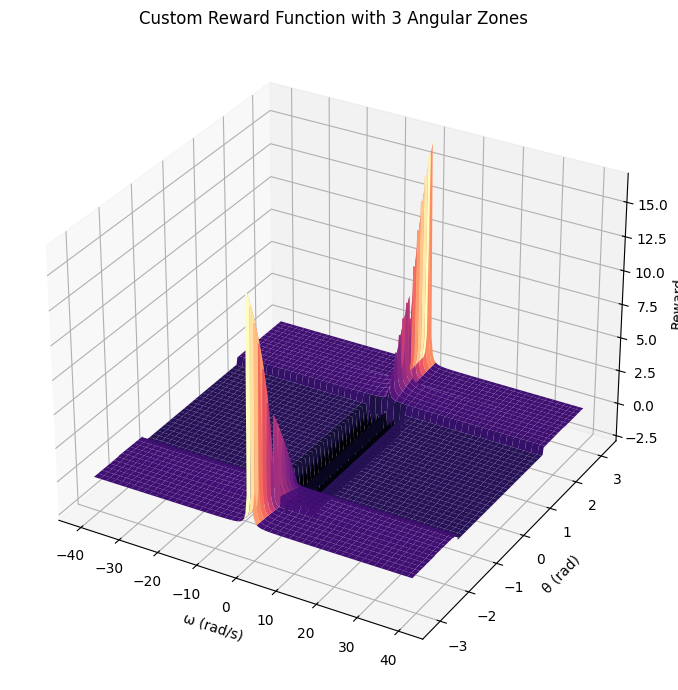

In [ ]:
################### THE BEST TESTED UNTIL NOW #################################

theta_abs = np.abs(Tg)
omega_abs = np.abs(Og)

# Initialize reward surface
reward1 = np.zeros_like(theta_abs)

# Region 1: θ < 0.5π
mask1 = theta_abs < 0.5 * np.pi

mask1_low_omega = mask1 & (omega_abs < 5)
mask1_high_omega = mask1 & (omega_abs >= 5)

# Apply different reward rules based on omega in Region 1
reward1[mask1_low_omega] = np.maximum(-omega_abs[mask1_low_omega]**2, -0.5) - np.abs(2 * np.cos(np.pi - 2 * np.pi * (6 * omega_abs[mask1_low_omega]) / 6))
reward1[mask1_high_omega] = np.maximum(-omega_abs[mask1_high_omega]**2, -0.5)

# Region 2: 0.5π ≤ θ < 0.75π
mask2 = (theta_abs >= 0.5 * np.pi) & (theta_abs < 0.75 * np.pi)
reward1[mask2] = 2 * (-np.cos(theta_abs[mask2]))  / (0.01 + omega_abs[mask2])

# Region 3: 0.75π ≤ θ ≤ π
mask3 = (theta_abs >= 0.75 * np.pi) & (theta_abs <= np.pi)
reward1[mask3] = (-np.cos(theta_abs[mask3]-np.pi/4))**0.5/ (0.01 + omega_abs[mask3]**2)

# Plot
fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Og, Tg, reward1, cmap='magma', edgecolor='none')
ax.set_title('Custom Reward Function with 3 Angular Zones')
ax.set_xlabel('ω (rad/s)')
ax.set_ylabel('θ (rad)')
ax.set_zlabel('Reward')

plt.tight_layout()
plt.show()

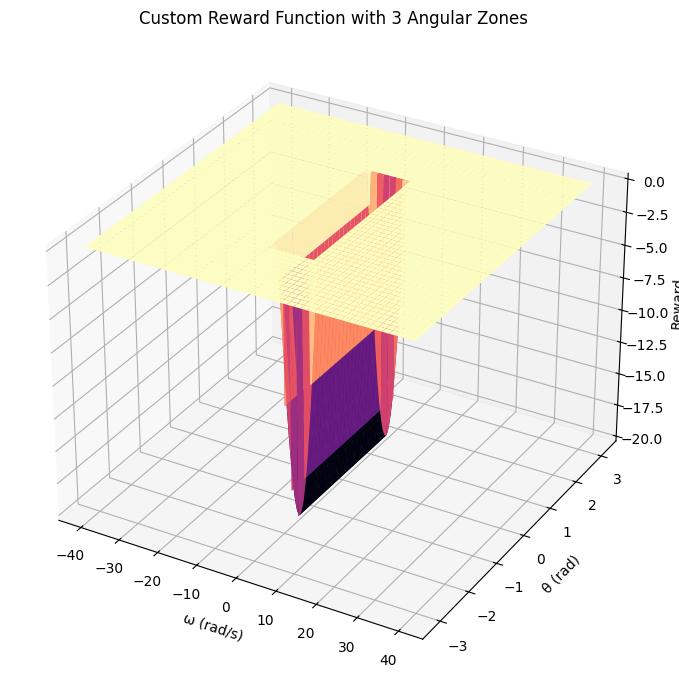

In [ ]:
theta_abs = np.abs(Tg)
omega_abs = np.abs(Og)

# Initialize reward surface
reward3 = np.zeros_like(theta_abs)

# Region 1: θ < 0.5π
mask1 = theta_abs < 0.5 * np.pi

mask1_low_omega = mask1 & (omega_abs < 5)
mask1_high_omega = mask1 & (omega_abs >= 5)

# Apply different reward rules based on omega in Region 1
reward3[mask1_low_omega] = - 10 * np.abs(2 * np.sin(0.5 * (np.pi - np.pi * (omega_abs[mask1_low_omega]) / 5))) #np.maximum(-omega_abs[mask1_low_omega]**2, -0.5) #
reward1[mask1_high_omega] = np.maximum(-omega_abs[mask1_high_omega]**2, -0.5)

# Region 2: 0.5π ≤ θ < 0.75π
mask2 = (theta_abs >= 0.5 * np.pi) & (theta_abs < 0.75 * np.pi)
reward1[mask2] = 2 * (-np.cos(theta_abs[mask2]))  / (0.01 + omega_abs[mask2])

# Region 3: 0.75π ≤ θ ≤ π
mask3 = (theta_abs >= 0.75 * np.pi) & (theta_abs <= np.pi)
reward1[mask3] = (-np.cos(theta_abs[mask3]-np.pi/4))**0.5/ (1 + omega_abs[mask3]**2)

# Plot
fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Og, Tg, reward3, cmap='magma', edgecolor='none')
ax.set_title('Custom Reward Function with 3 Angular Zones')
ax.set_xlabel('ω (rad/s)')
ax.set_ylabel('θ (rad)')
ax.set_zlabel('Reward')

plt.tight_layout()
plt.show()

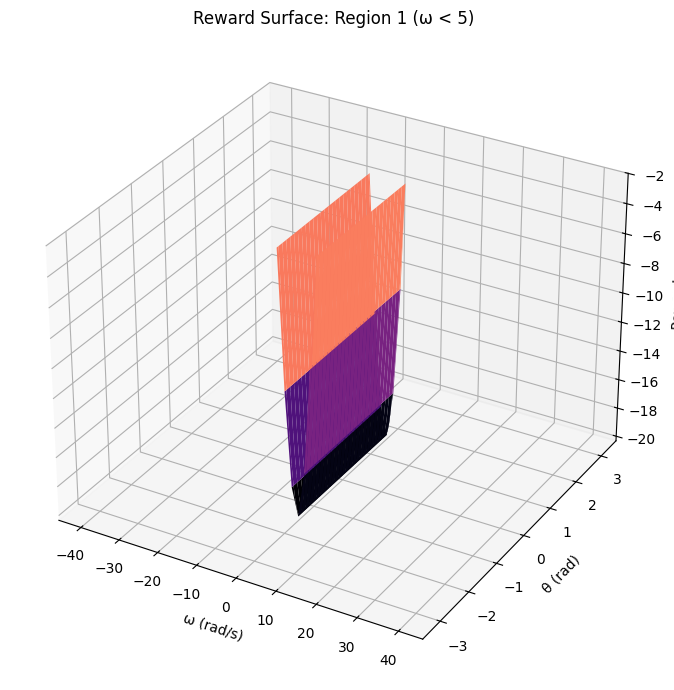

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create a masked reward surface: keep only mask1_low_omega region
reward_plot = np.full_like(reward3, np.nan)
reward_plot[mask1_low_omega] = reward3[mask1_low_omega]  # Keep only the target region

# Plot
fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Og, Tg, reward_plot, cmap='magma', edgecolor='none')

ax.set_title('Reward Surface: Region 1 (ω < 5)')
ax.set_xlabel('ω (rad/s)')
ax.set_ylabel('θ (rad)')
ax.set_zlabel('Reward')

plt.tight_layout()
plt.show()


In [ ]:
fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot only the points where mask1_low_omega is True
ax.scatter(Og[mask1_low_omega], Tg[mask1_low_omega], reward3[mask1_low_omega], c=reward3[mask1_low_omega], cmap='magma')

ax.set_title('Reward Surface: Region 1 (ω < 5)')
ax.set_xlabel('ω (rad/s)')
ax.set_ylabel('θ (rad)')
ax.set_zlabel('Reward')

plt.tight_layout()
plt.show()


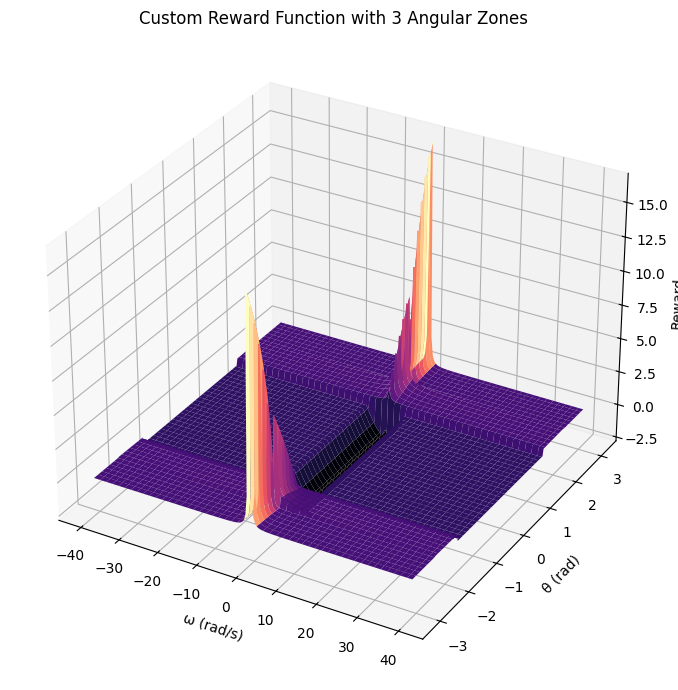

In [ ]:
################### THE NEW BEST TESTED UNTIL NOW #################################


theta_abs = np.abs(Tg)
omega_abs = np.abs(Og)

# Initialize reward surface
reward1 = np.zeros_like(theta_abs)

# Region 1: θ < 0.5π
mask1 = theta_abs < 0.5 * np.pi

mask1_low_omega = mask1 & (omega_abs < 5)
mask1_high_omega = mask1 & (omega_abs >= 5)

# Apply different reward rules based on omega in Region 1
reward1[mask1_low_omega] = np.maximum(-omega_abs[mask1_low_omega]**2, -0.5) - np.abs(2 * np.sin(0.5 * (np.pi - np.pi * (omega_abs[mask1_low_omega]) / 5)))
reward1[mask1_high_omega] = np.maximum(-omega_abs[mask1_high_omega]**2, -0.5)

# Region 2: 0.5π ≤ θ < 0.75π
mask2 = (theta_abs >= 0.5 * np.pi) & (theta_abs < 0.75 * np.pi)
reward1[mask2] = 2 * (-np.cos(theta_abs[mask2]))  / (0.01 + omega_abs[mask2])

# Region 3: 0.75π ≤ θ ≤ π
mask3 = (theta_abs >= 0.75 * np.pi) & (theta_abs <= np.pi)
reward1[mask3] = (-np.cos(theta_abs[mask3]-np.pi/4))**0.5/ (0.01 + omega_abs[mask3]**2)

# Plot
fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Og, Tg, reward1, cmap='magma', edgecolor='none')
ax.set_title('Custom Reward Function with 3 Angular Zones')
ax.set_xlabel('ω (rad/s)')
ax.set_ylabel('θ (rad)')
ax.set_zlabel('Reward')

plt.tight_layout()
plt.show()

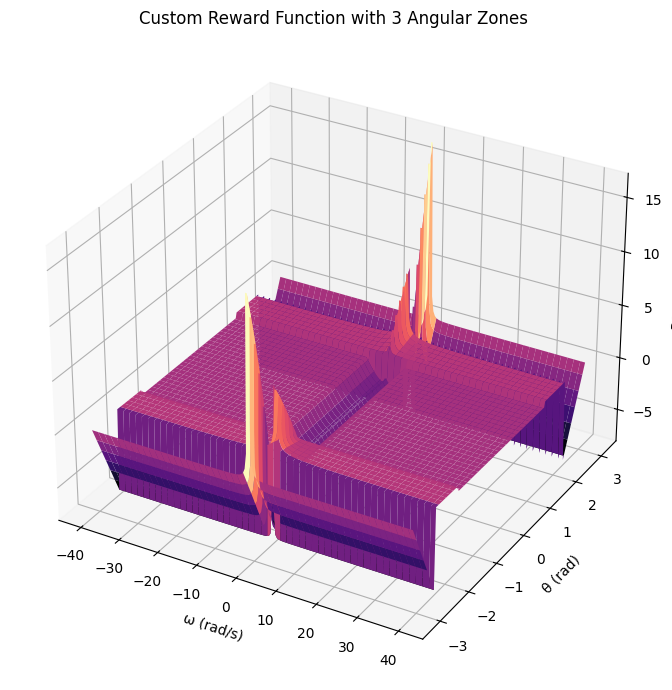

In [ ]:
theta_abs = np.abs(Tg)
omega_abs = np.abs(Og)

# Initialize reward surface
reward99 = np.zeros_like(theta_abs)

# Region 1: θ < 0.5π
mask1 = theta_abs < 0.5 * np.pi

mask1_low_omega = mask1 & (omega_abs < 5)
mask1_high_omega = mask1 & (omega_abs >= 5)

# Apply different reward rules based on omega in Region 1
reward99[mask1_low_omega] = np.maximum(-omega_abs[mask1_low_omega]**2, -0.5) - np.abs(2 * np.sin(0.5 * (np.pi - np.pi * (omega_abs[mask1_low_omega]) / 5)))
reward99[mask1_high_omega] = np.maximum(-omega_abs[mask1_high_omega]**2, -0.5)

# Region 2: 0.5π ≤ θ < 0.75π
mask2 = (theta_abs >= 0.5 * np.pi) & (theta_abs < 0.75 * np.pi)
reward99[mask2] = 2 * (-np.cos(theta_abs[mask2]))  / (0.01 + omega_abs[mask2])

# Region 3: 0.75π ≤ θ ≤ π
mask3 = (theta_abs >= 0.75 * np.pi) & (theta_abs <= np.pi)
reward99[mask3] = (-np.cos(theta_abs[mask3]-np.pi/4))**0.5/ (0.01 + omega_abs[mask3]**2) - 5 * (np.pi-theta_abs[mask3]) * 2

# Plot
fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Og, Tg, reward99, cmap='magma', edgecolor='none')
ax.set_title('Custom Reward Function with 3 Angular Zones')
ax.set_xlabel('ω (rad/s)')
ax.set_ylabel('θ (rad)')
ax.set_zlabel('Reward')

plt.tight_layout()
plt.show()

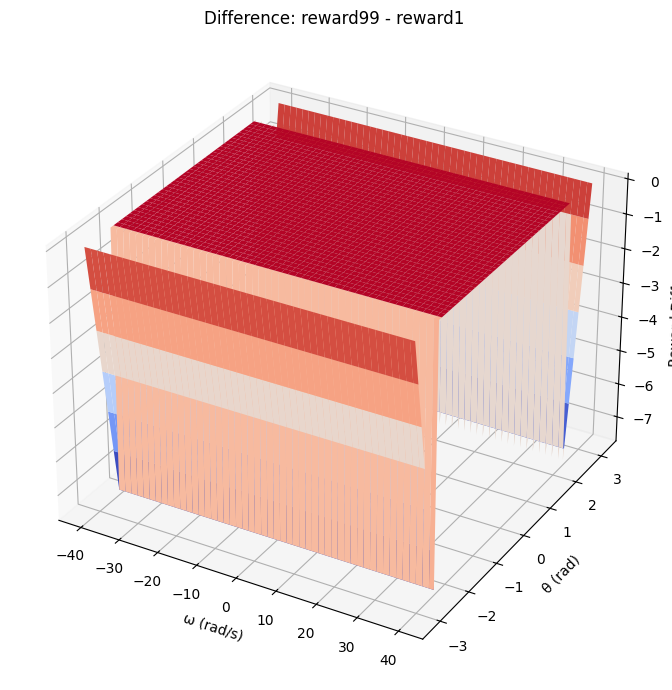

In [ ]:
reward_difference = reward99 - reward1

fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Og, Tg, reward_difference, cmap='coolwarm', edgecolor='none')
ax.set_title('Difference: reward99 - reward1')
ax.set_xlabel('ω (rad/s)')
ax.set_ylabel('θ (rad)')
ax.set_zlabel('Reward Difference')

plt.tight_layout()
plt.show()


/tmp/ipython-input-39-284743893.py:23: RuntimeWarning: invalid value encountered in sqrt
  reward1[mask3] = (-np.cos(theta_abs[mask3]-np.pi/2))**0.5/ (0.0001 + omega_abs[mask3]**1.5)


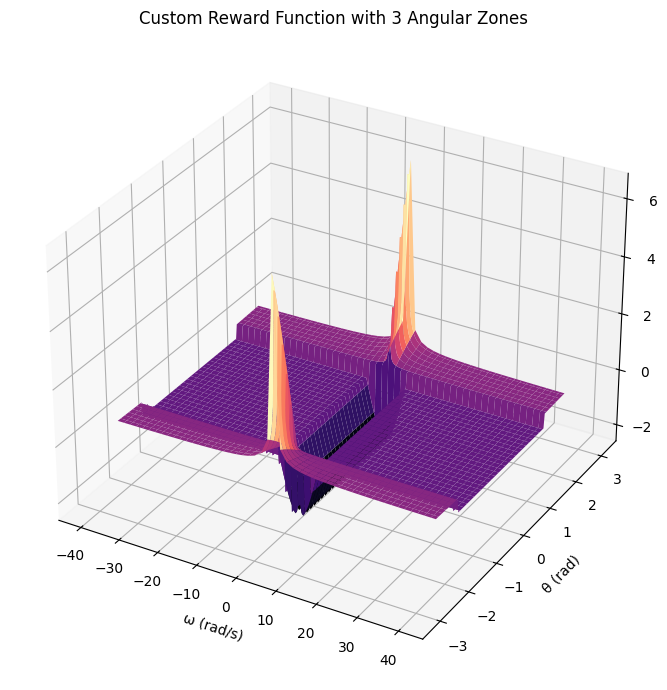

In [ ]:
theta_abs = np.abs(Tg)
omega_abs = np.abs(Og)

# Initialize reward surface
reward1 = np.zeros_like(theta_abs)

# Region 1: θ < 0.5π
mask1 = theta_abs < 0.5 * np.pi

mask1_low_omega = mask1 & (omega_abs < 5)
mask1_high_omega = mask1 & (omega_abs >= 5)

# Apply different reward rules based on omega in Region 1
reward1[mask1_low_omega] = np.maximum(-omega_abs[mask1_low_omega]**2, -0.5) - np.abs(2 * np.sin(0.5 * (np.pi - np.pi * (omega_abs[mask1_low_omega]) / 5)))
reward1[mask1_high_omega] = np.maximum(-omega_abs[mask1_high_omega]**2, -0.5)

# Region 2: 0.5π ≤ θ < 0.75π
mask2 = (theta_abs >= 0.5 * np.pi) & (theta_abs < 0.75 * np.pi)
reward1[mask2] = 2 * (-np.cos(theta_abs[mask2]))  / (0.01 + omega_abs[mask2])

# Region 3: 0.75π ≤ θ ≤ π
mask3 = (theta_abs >= 0.75 * np.pi) & (theta_abs <= np.pi)
reward1[mask3] = (-np.cos(theta_abs[mask3]-np.pi/2))**0.5/ (0.0001 + omega_abs[mask3]**1.5)

# Plot
fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Og, Tg, reward1, cmap='magma', edgecolor='none')
ax.set_title('Custom Reward Function with 3 Angular Zones')
ax.set_xlabel('ω (rad/s)')
ax.set_ylabel('θ (rad)')
ax.set_zlabel('Reward')

plt.tight_layout()
plt.show()

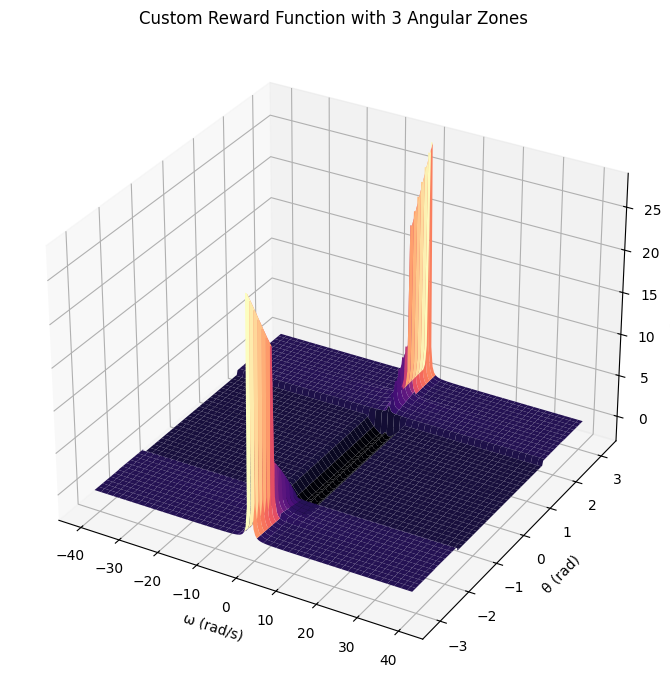

In [ ]:
theta_abs = np.abs(Tg)
omega_abs = np.abs(Og)

# Initialize reward surface
reward88 = np.zeros_like(theta_abs)

# Region 1: θ < 0.5π
mask1 = theta_abs < 0.5 * np.pi

mask1_low_omega = mask1 & (omega_abs < 5)
mask1_high_omega = mask1 & (omega_abs >= 5)

# Apply different reward rules based on omega in Region 1
reward88[mask1_low_omega] = np.maximum(-omega_abs[mask1_low_omega]**2, -0.5) - np.abs(2 * np.sin(0.5 * (np.pi - np.pi * (omega_abs[mask1_low_omega]) / 5)))
reward88[mask1_high_omega] = np.maximum(-omega_abs[mask1_high_omega]**2, -0.5)

# Region 2: 0.5π ≤ θ < 0.75π
mask2 = (theta_abs >= 0.5 * np.pi) & (theta_abs < 0.75 * np.pi)
reward88[mask2] = 2 * (-np.cos(theta_abs[mask2]))  / (0.01 + omega_abs[mask2])

# Region 3: 0.75π ≤ θ ≤ π
mask3 = (theta_abs >= 0.75 * np.pi) & (theta_abs <= np.pi)
reward88[mask3] = (np.exp(-np.cos(theta_abs[mask3]- np.pi/4)))**0.5/ (0.01 + omega_abs[mask3]**2)

# Plot
fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Og, Tg, reward88, cmap='magma', edgecolor='none')
ax.set_title('Custom Reward Function with 3 Angular Zones')
ax.set_xlabel('ω (rad/s)')
ax.set_ylabel('θ (rad)')
ax.set_zlabel('Reward')

plt.tight_layout()
plt.show()

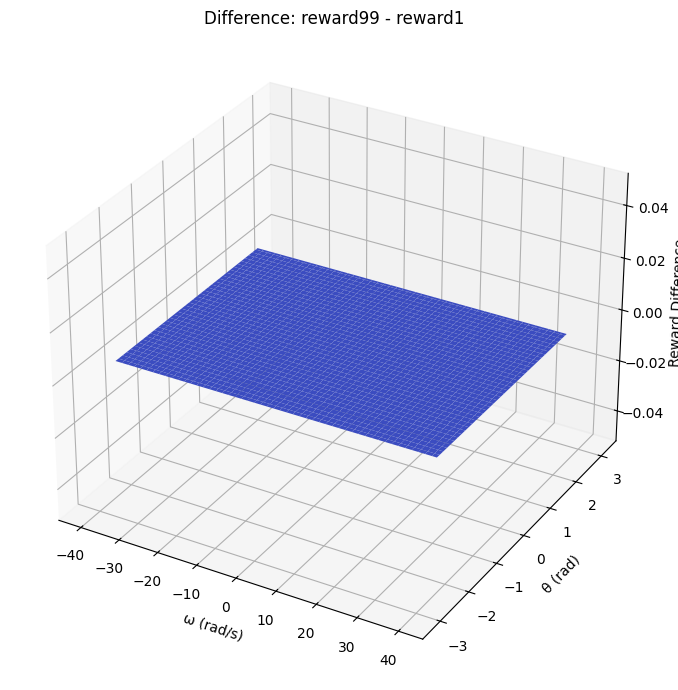

In [ ]:
reward_difference = reward88 - reward1

fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Og, Tg, reward_difference, cmap='coolwarm', edgecolor='none')
ax.set_title('Difference: reward99 - reward1')
ax.set_xlabel('ω (rad/s)')
ax.set_ylabel('θ (rad)')
ax.set_zlabel('Reward Difference')

plt.tight_layout()
plt.show()


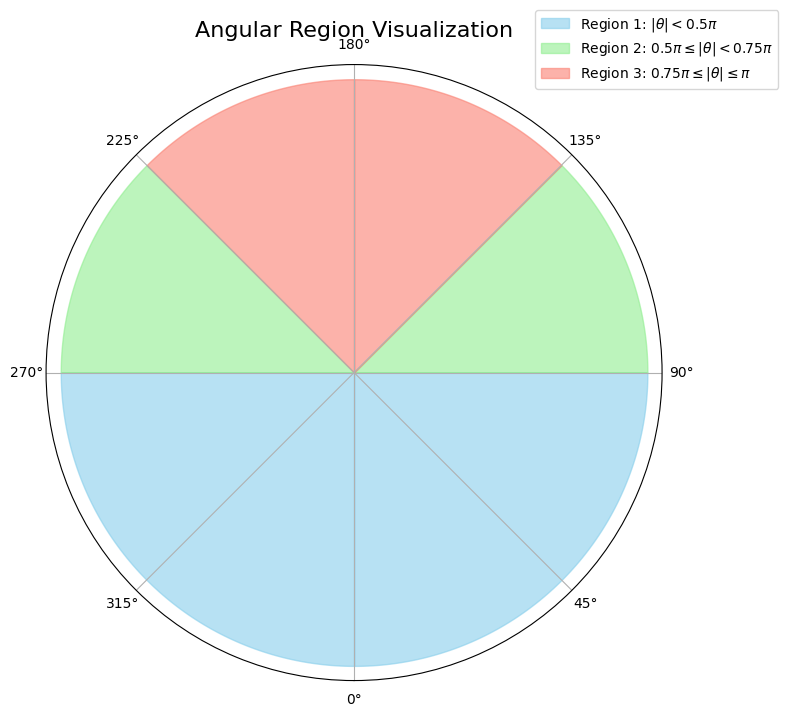

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the regions
theta1 = np.linspace(0, 0.5 * np.pi, 100)
theta2 = np.linspace(0.5 * np.pi, 0.75 * np.pi, 100)
theta3 = np.linspace(0.75 * np.pi, np.pi, 100)

r = np.ones_like(theta1)  # Constant radius to fill the circle

# Create the plot
fig = plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Plot each region
ax.fill_between(theta1, 0, 1, color='skyblue', alpha=0.6, label=r'Region 1: $|\theta| < 0.5\pi$')
ax.fill_between(theta2, 0, 1, color='lightgreen', alpha=0.6, label=r'Region 2: $0.5\pi \leq |\theta| < 0.75\pi$')
ax.fill_between(theta3, 0, 1, color='salmon', alpha=0.6, label=r'Region 3: $0.75\pi \leq |\theta| \leq \pi$')

# Optional: Mirror the regions to negative θ
ax.fill_between(-theta1, 0, 1, color='skyblue', alpha=0.6)
ax.fill_between(-theta2, 0, 1, color='lightgreen', alpha=0.6)
ax.fill_between(-theta3, 0, 1, color='salmon', alpha=0.6)

# Set π at the top, 0 at the bottom
ax.set_theta_zero_location('S')
ax.set_theta_direction(1)

# Decorations
ax.set_rticks([])
ax.set_yticklabels([])
ax.set_title('Angular Region Visualization', fontsize=16, pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))

plt.show()


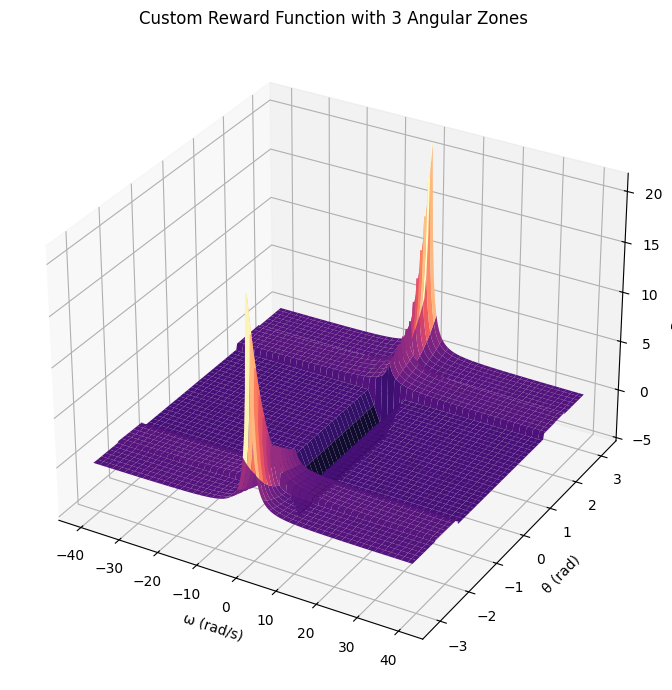

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create the grid
theta = np.linspace(-np.pi, np.pi, 200)
omega = np.linspace(-40, 40, 200)
Tg, Og = np.meshgrid(theta, omega)

theta_abs = np.abs(Tg)
omega_abs = np.abs(Og)

# Initialize reward surface
reward1 = np.zeros_like(theta_abs)

# Region 1: θ < 0.5π
mask1 = theta_abs < 0.5 * np.pi
reward1[mask1] = np.minimum(-0.5, -5 + omega_abs[mask1])


# Region 2: 0.5π ≤ θ < 0.75π
mask2 = (theta_abs >= 0.5 * np.pi) & (theta_abs < 0.75 * np.pi)
reward1[mask2] = (theta_abs[mask2])**2/ (1 + omega_abs[mask2])

# Region 3: 0.75π ≤ θ ≤ π
mask3 = (theta_abs >= 0.75 * np.pi) & (theta_abs <= np.pi)
reward1[mask3] = (theta_abs[mask2])**4/ (1 + (omega_abs[mask3]))**2

# Plot
fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Og, Tg, reward1, cmap='magma', edgecolor='none')
ax.set_title('Custom Reward Function with 3 Angular Zones')
ax.set_xlabel('ω (rad/s)')
ax.set_ylabel('θ (rad)')
ax.set_zlabel('Reward')

plt.tight_layout()
plt.show()